In [1]:
%load_ext autoreload
%autoreload 2

from RBM import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# it's interesting to test this code with p == 1.0 or p == 0.0 ;)
p = .8
X_train = np.random.binomial(n=1, p=p, size=(200, 2))
X_test  = np.random.binomial(n=1, p=p, size=(200, 2))

In [3]:
nn = RBM(layers=[
        BernoulliLayer(X_train.shape[1]),
        BernoulliLayer(3)
    ], loss_function='NLL')
nn.fit(X_train, n_epochs=100, learning_rate=.01, n_gibbs_steps=1, batch_size=10, test_size=0)

epoch = 99; learning_rate = 0.01; criteria_train = 1.04594774548; 


In [4]:
print 'weights:\n', nn.weights
print 'bias (visible):\n', nn.layers[0].bias
print 'bias (hidden):\n',  nn.layers[1].bias

weights:
[[ 0.52936406  0.40333571  0.29138525]
 [ 0.38707304  0.35685291  0.21255459]]
bias (visible):
[[ 0.651  0.519]]
bias (hidden):
[[ 0.15594343  0.06543495 -0.01501168]]


In [5]:
nn.predict_proba_mean(X_train), np.mean(X_train, axis=0), p

(array([ 0.81235561,  0.76234148]), array([ 0.805,  0.755]), 0.8)

In [6]:
nn.predict_proba_mean(X_test), np.mean(X_test, axis=0), p

(array([ 0.80716716,  0.75786555]), array([ 0.84,  0.83]), 0.8)

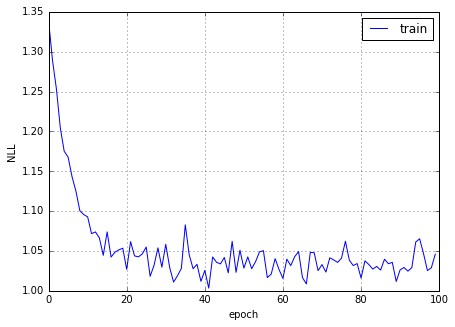

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(nn.error_train, label='train')
if nn.error_test:
    plt.plot(nn.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.legend()
plt.grid()